In [84]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url

In [2]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [3]:
review_query = '''
    SELECT *
    FROM reviews;
'''

review_data = pd.read_sql(review_query, connection)

In [125]:
print("Shape:", review_data.shape)
print("\nColumns:", review_data.columns.values)
print("\nColumns with missing values:\n", review_data.isna().any(), sep='')

ratings = review_data['rating']
print("\nDescriptive Statistics for Rating:\n", ratings.describe(), sep='')

year_month_day = review_data['datetime_created'].dt.to_period('D')
print("\nYear Month Day: {} to {}".format(year_month_day.min(), year_month_day.max()))

Shape: (10000, 5)

Columns: ['user_id' 'review' 'rating' 'version' 'datetime_created']

Columns with missing values:
user_id             False
review              False
rating              False
version              True
datetime_created    False
dtype: bool

Descriptive Statistics for Rating:
count    10000.000000
mean         4.492200
std          1.054443
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Year Month Day: 2020-05-05 to 2020-06-27


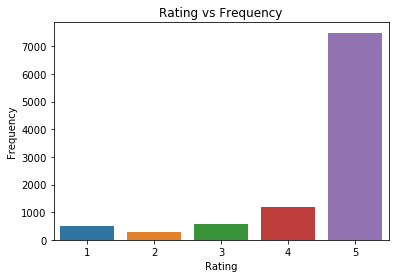

Rating and Frequency:
5    7491
4    1189
3     562
1     491
2     267
Name: rating, dtype: int64


In [63]:
rating_countplot = sns.countplot(x='rating', data=review_data)
rating_countplot.set(
    title='Rating vs Frequency',
    xlabel='Rating',
    ylabel='Frequency'
)
plt.show()

print("Rating and Frequency:\n", review_data['rating'].value_counts(), sep='')

In [ ]:
# month vs frequency of each rating
# month vs average rating

In [ ]:
connection.close()
engine.dispose()